<a href="https://colab.research.google.com/github/bhavana-0208/DigiSapiens/blob/main/DigiSapiens_IE506_Courseproject_MidtermReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def parse_cisi_dataset(file_path):
    documents = []
    with open(file_path, 'r', encoding='utf-8') as file:
        current_doc_id = None
        current_doc_text = ""
        for line in file:
            if line.startswith('.I'):
                # New document ID found
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, 'Text': current_doc_text.strip()})
                current_doc_id = int(line.split()[-1])
                current_doc_text = ""
            elif line.startswith('.X'):
                # End of document reached
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, 'Text': current_doc_text.strip()})
                current_doc_id = None
            elif current_doc_id is not None:
                # Collect text for the current document
                current_doc_text += line.strip() + " "
    return pd.DataFrame(documents)

cisi_dataset_path = 'cisi.all'
parsed_dataset = parse_cisi_dataset('/content/CISI.ALL')
print(parsed_dataset)

In [ ]:
def parse_cisi_dataset(file_path):
    documents = []
    with open(file_path, 'r', encoding='utf-8') as file:
        current_doc_id = None
        current_doc_text = ""
        for line in file:
            if line.startswith('.I'):
                # New document ID found
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, 'Text': current_doc_text.strip()})
                current_doc_id = int(line.split()[-1])
                current_doc_text = ""
            elif line.startswith('.X'):
                # End of document reached
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, 'Text': current_doc_text.strip()})
                current_doc_id = None
            elif current_doc_id is not None:
                # Collect text for the current document
                current_doc_text += line.strip() + " "
    return documents

def print_tabular(data):
    print("{:<10}{}".format("Doc ID", "Text"))
    print("=" * 50)
    for doc in data:
        print("{:<10}{}".format(doc['Doc_ID'], doc['Text'][:50]))  # Printing only first 50 characters for brevity

cisi_dataset_path = '/content/CISI.ALL'
parsed_dataset = parse_cisi_dataset(cisi_dataset_path)
print_tabular(parsed_dataset)


In [ ]:
import csv

def parse_cisi_dataset(file_path):
    documents = []
    current_doc_id = None
    current_column = None
    current_doc_text = ""

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.startswith('.I'):
                # New document ID found
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_text = ""
                current_doc_id = int(line.split()[-1])
            elif line.startswith('.W'):
                # Switching to a new column
                current_column = 'Text'
            elif line.startswith('.X'):
                # reached end of document
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_id = None
                    current_column = None
                    current_doc_text = ""
            elif current_column == 'Text':
                # Collecting text for the current column
                current_doc_text += line.strip() + " "

    return documents

def print_tabular(data):
    print("{:<10}{}".format("Doc ID", "Text"))
    print("=" * 50)
    for doc in data:
        print("{:<10}{}".format(doc['Doc_ID'], doc['Text'][:100]))  # Printing only first 50 characters for brevity

def save_to_csv(data, file_path):
    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Doc_ID', 'Text']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for doc in data:
            writer.writerow(doc)

# Example usage:
cisi_dataset_path = '/content/CISI.ALL'
parsed_dataset = parse_cisi_dataset(cisi_dataset_path)
a= print_tabular(parsed_dataset)

csv_file_path = 'cisi_dataset.csv'
save_to_csv(parsed_dataset, csv_file_path)


In [ ]:
import csv

def parse_med_dataset(file_path):
    documents = []
    current_doc_id = None
    current_column = None
    current_doc_text = ""

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.startswith('.I'):
                # New document ID found
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_text = ""
                current_doc_id = int(line.split()[-1])
            elif line.startswith('.W'):
                # Switching to a new column
                current_column = 'Text'
            elif line.startswith('.X'):
                # End of document reached
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_id = None
                    current_column = None
                    current_doc_text = ""
            elif current_column == 'Text':
                # Collecting text for the current column
                current_doc_text += line.strip() + " "

    return documents

def print_tabular(data):
    print("{:<10}{}".format("Doc ID", "Text"))
    print("=" * 50)
    for doc in data:
        print("{:<10}{}".format(doc['Doc_ID'], doc['Text'][:100]))  # Printing only first 50 characters for brevity

def save_to_csv(data, file_path):
    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Doc_ID', 'Text']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for doc in data:
            writer.writerow(doc)

# Example usage:
med_dataset_path = '/content/MED.ALL'
parsed_dataset_med = parse_med_dataset(med_dataset_path)
bin= print_tabular(parsed_dataset_med)

csv_file_path = 'med_dataset.csv'
save_to_csv(parsed_dataset_med, csv_file_path)

In [ ]:
import csv

def parse_cran_dataset(file_path):
    documents = []
    current_doc_id = None
    current_column = None
    current_doc_text = ""

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.startswith('.I'):
                # New document ID found
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_text = ""
                current_doc_id = int(line.split()[-1])


            elif line.startswith('.T'):
                # Switching to a new column
                current_column = 'Title'




            elif line.startswith('.W'):
                # Switching to a new column
                current_column = 'Text'
            elif line.startswith('.X'):
                # End of document reached
                if current_doc_id is not None:
                    documents.append({'Doc_ID': current_doc_id, current_column: current_doc_text.strip()})
                    current_doc_id = None
                    current_column = None
                    current_doc_text = ""
            elif current_column == 'Text':
                # Collecting text for the current column
                current_doc_text += line.strip() + " "

    return documents

def print_tabular(data):
    print("{:<10}{}".format("Doc ID", "Text"))
    print("=" * 50)
    for doc in data:
        print("{:<10}{}".format(doc['Doc_ID'], doc['Text'][:100]))  # Printing only first 50 characters for brevity

def save_to_csv(data, file_path):
    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Doc_ID', 'Text']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for doc in data:
            writer.writerow(doc)

# Example usage:
cran_dataset_path = '/content/cran.all.1400'
parsed_dataset_cran = parse_cran_dataset(cran_dataset_path)
bin= print_tabular(parsed_dataset_cran)

csv_file_path = 'cran_dataset.csv'
save_to_csv(parsed_dataset_cran, csv_file_path)

In [ ]:
import pandas as pd
cisi = pd.read_csv('/content/med_dataset.csv')
cisi.head()

In [ ]:
med = pd.read_csv('/content/med_dataset.csv')
med.head()

In [ ]:
cran = pd.read_csv('/content/cran_dataset.csv')
cran.head()

In [ ]:
cisi.drop(columns=['Doc_ID'],inplace=True)
display(cisi.head())

In [ ]:
med.drop(columns=['Doc_ID'],inplace=True)
display(med.head())
cran.drop(columns=['Doc_ID'],inplace=True)
display(cran.head())

In [ ]:
cisi_10 = cisi.head(10)
med_10 = med.head(10)
cran_10 = cran.head(10)
display(cisi_10.shape)

In [ ]:
dataset_30 = pd.concat([cisi_10,med_10,cran_10])
dataset_30

In [ ]:
cisi_50 = cisi.head(50)
med_50 = med.head(50)
cran_50 = cran.head(50)
dataset_150 = pd.concat([cisi_50,med_50,cran_50])
dataset_150.shape

In [ ]:
cisi_100 = cisi.head(100)
med_100 = med.head(100)
cran_100 = cran.head(100)
dataset_300 = pd.concat([cisi_100,med_100,cran_100])
dataset_300.shape

In [ ]:
from google.colab import files
csv_file_path = 'dataset_30.csv'
dataset_30.to_csv(csv_file_path, index=False)

In [ ]:
# files.download('dataset_30.csv')

In [ ]:
from google.colab import files
csv_file_path = 'dataset_150.csv'
dataset_150.to_csv(csv_file_path, index=False)
# files.download('dataset_150.csv')

In [ ]:
from google.colab import files
csv_file_path = 'dataset_300.csv'
dataset_300.to_csv(csv_file_path, index=False)
# files.download('dataset_300.csv')

In [ ]:
import pandas as pd
dataset_30 = pd.read_csv('/content/dataset_30.csv')
from sklearn.feature_extraction.text import TfidfVectorizer
documents = dataset_30['Text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features_dataset_30 = vectorizer.fit_transform(documents)
features_dataset_30

dense_matrix = features_dataset_30.toarray()

df_features_dataset_30 = pd.DataFrame(dense_matrix)

In [ ]:

dataset_150 = pd.read_csv('/content/dataset_150.csv')
from sklearn.feature_extraction.text import TfidfVectorizer
documents = dataset_150['Text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features_dataset_150 = vectorizer.fit_transform(documents)
features_dataset_150
dense_matrix = features_dataset_150.toarray()
df_features_dataset_150 = pd.DataFrame(dense_matrix)

In [ ]:
dataset_300 = pd.read_csv('/content/dataset_300.csv')
from sklearn.feature_extraction.text import TfidfVectorizer
documents = dataset_300['Text'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features_dataset_300 = vectorizer.fit_transform(documents)
features_dataset_300

dense_matrix = features_dataset_300.toarray()

df_features_dataset_300 = pd.DataFrame(dense_matrix)

In [ ]:
terms = vectorizer.get_feature_names_out()
print(terms[:10])

['000' '01' '06' '10' '100' '101' '104' '11' '1100' '112']


### K-means on small dataset

In [ ]:
import random
import numpy as np

class KMeans:
  def __init__(self,n_clusters=5,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.labels_ = None
    self.centroids = None
    self.n_iter_ = None

  def fit_predict(self,X):

      random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
      self.centroids = X[random_index]

      for i in range(self.max_iter):
          # assigning clusters
          cluster_group = self.assign_clusters(X)
          old_centroids = np.copy(self.centroids)
          # moving centroids
          self.move_centroids(X,cluster_group)

          if np.allclose(old_centroids, self.centroids):
              break

      self.n_iter_ = i + 1  #iterations completed
      return cluster_group

  def assign_clusters(self, X):
        # Assigning each data point to the nearest centroid
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        cluster_group = np.argmin(distances, axis=1)
        return cluster_group

  def move_centroids(self, X, cluster_group):
        # Moving centroids to the mean of their assigned points
        for i in range(self.n_clusters):
            if np.any(cluster_group == i):
                self.centroids[i] = np.mean(X[cluster_group == i], axis=0)



In [ ]:
import pandas as pd

X = df_features_dataset_30.iloc[:,:].values

km = KMeans(n_clusters=3,max_iter=500)
y_means = km.fit_predict(X)

for cluster_num in range(3):
    print(f"Samples assigned to cluster {cluster_num}:")
    cluster_samples = df_features_dataset_30[y_means == cluster_num].index
    print(cluster_samples)
    print()

print("Final centroids:", km.centroids)
print("Number of iterations performed:", km.n_iter_)


Samples assigned to cluster 0:
Index([0, 1, 2, 3, 4, 6, 7, 8, 9, 18], dtype='int64')

Samples assigned to cluster 1:
Index([10, 11, 12, 13, 14, 15, 17, 19], dtype='int64')

Samples assigned to cluster 2:
Index([5, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64')

Final centroids: [[0.         0.         0.00906185 ... 0.01518333 0.01062798 0.        ]
 [0.01059011 0.0118775  0.         ... 0.         0.         0.006907  ]
 [0.02490678 0.         0.         ... 0.         0.         0.        ]]
Number of iterations performed: 2


### Spherical K-means

In [ ]:
def spherical_k_means(X, k, tolerance=1e-6, max_iterations=100):
    n, d = X.shape
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(n, k, replace=False)]
    prev_objective = np.inf
    num_iterations = 0

    for iteration in range(max_iterations):
        # Assign each point to the nearest centroid
        distances = np.dot(X, centroids.T)
        cluster_assignments = np.argmax(distances, axis=1)

        # Update centroids
        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            norm = np.linalg.norm(cluster_points, axis=1, keepdims=True)
            centroids[i] = np.sum(cluster_points / norm, axis=0)

        # Calculate objective function value
        dot_products = np.sum(distances[np.arange(n), cluster_assignments])
        objective = dot_products

        # Check convergence
        if np.abs(objective - prev_objective) < tolerance:
            break

        prev_objective = objective
        num_iterations += 1

    return centroids, cluster_assignments, objective, num_iterations

In [ ]:
X = df_features_dataset_30.values

k=3

centroids, cluster_assignments, objective, num_iterations = spherical_k_means(X, k)
print("Number of iterations:", num_iterations)
print("centroids:",centroids)
print("cluster_assignments:",cluster_assignments)
print("objective:",objective)

Number of iterations: 3
centroids: [[0.3836023  0.09502    0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.05525604]
 [0.         0.         0.09061848 ... 0.15183333 0.10627975 0.        ]]
cluster_assignments: [0 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1]
objective: 51.80219310890706


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cluster_assignments

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
true_clusters = [0] * 10 + [1] * 10 + [2] * 10
np.array(true_clusters)
print(true_clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
cm= confusion_matrix(true_clusters, cluster_assignments)
print(cm)

[[1 0 9]
 [8 2 0]
 [7 3 0]]


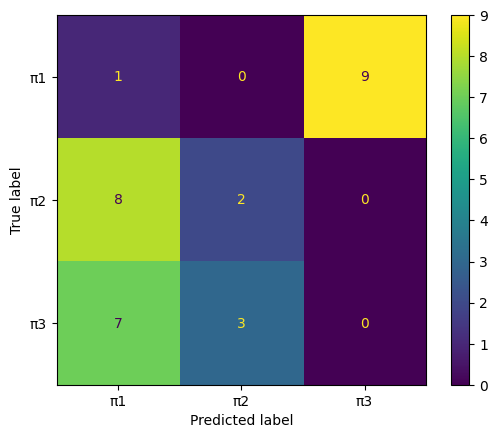

In [ ]:
cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['π1','π2','π3'])
cm_disp.plot()

### Refinement Algorithm

In [ ]:
import numpy as np

def spherical_k_means(X, k, tolerance=1e-6, max_iterations=100):
    n, d = X.shape
    # Initializing the cluster centroids randomly
    centroids = X[np.random.choice(n, k, replace=False)]
    prev_objective = np.inf

    for iteration in range(max_iterations):
        # Assigning each point to the nearest centroid
        distances = np.dot(X, centroids.T)
        cluster_assignments = np.argmax(distances, axis=1)

        # Updating centroids
        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            norm = np.linalg.norm(cluster_points, axis=1, keepdims=True)
            centroids[i] = np.sum(cluster_points / norm, axis=0)

        # Calculating objective function value
        dot_products = np.sum(distances[np.arange(n), cluster_assignments])
        objective = dot_products

        #convergence
        if objective - prev_objective < tolerance:
            break

        prev_objective = objective

        # Sorting centroids based on their norm
        norms = np.linalg.norm(centroids, axis=1)
        sorted_indices = np.argsort(norms)
        centroids = centroids[sorted_indices]


    return centroids, cluster_assignments, objective

def kernighan_lin_first_variation(X, cluster_assignments, centroids, k):
    n, d = X.shape
    # Initializing objective change
    max_change = 0
    max_i = 0

    for i in range(n):
        for j in range(k):
            if cluster_assignments[i] != j:
                # Computing quality change after moving point i to cluster j
                old_cluster = cluster_assignments[i]
                new_centroids = np.copy(centroids)
                new_centroids[old_cluster] -= X[i] / np.linalg.norm(X[i])
                new_centroids[j] += X[i] / np.linalg.norm(X[i])
                old_q = (X[i] @ centroids[old_cluster])
                new_q = (X[i] @ new_centroids[j])
                change = new_q - old_q
                if change > max_change:
                    max_change = change
                    max_i = i
    return max_i, max_change

def refinement_algorithm(X, k, tolerance=1e-6, max_iterations=100, f=1):
    n, d = X.shape
    # Initializing cluster assignments randomly
    cluster_assignments = np.random.randint(0, k, n)
    prev_objective = np.inf
    objective_values = []

    for t in range(max_iterations):
        # Step 1: Spherical k-Means Iteration
        centroids, cluster_assignments, objective = spherical_k_means(X, k, tolerance, max_iterations)
        if objective - prev_objective > tolerance:
            prev_objective = objective
            objective_values.append((t, 'Spherical k-Means', objective))
            continue

        # Step 2: Kernighan-Lin First Variation
        max_change = 0
        max_i = 0
        unmarked_indices = set(range(n))
        for _ in range(f):
            i, change = kernighan_lin_first_variation(X, cluster_assignments, centroids, k)
            max_change += change
            max_i = i
            if i in unmarked_indices:
                unmarked_indices.remove(i)

        if max_change > tolerance:
            old_cluster = cluster_assignments[max_i]
            new_cluster = np.argmax(np.dot(X[max_i], centroids.T))
            cluster_assignments[max_i] = new_cluster
            centroids[old_cluster] -= X[max_i] / np.linalg.norm(X[max_i])
            centroids[new_cluster] += X[max_i] / np.linalg.norm(X[max_i])

            if max_i in unmarked_indices:
                unmarked_indices.remove(max_i)
            prev_objective = objective
            objective_values.append((t, 'Kernighan-Lin First Variation', objective))
        else:

            break

            if prev_objective - objective < 0:
               break

    return centroids, cluster_assignments, objective, np.array(objective_values)



In [ ]:
import pandas as pd
import numpy as np

def normalize_vectors(X):
    return X / np.linalg.norm(X, axis=1, keepdims=True)

X = df_features_dataset_30.to_numpy()

X_normalized = normalize_vectors(X)

k = 3

centroids, cluster_assignments, objective, objective_values = refinement_algorithm(X_normalized, k,f=1)

print("Final Centroids:")
print(centroids)
print("\nCluster Assignments:")
print(cluster_assignments)
print("\nFinal Objective Function Value:", objective)
print("\nConvergence:")
print("Iteration\tAlgorithm\t\tObjective Value")
for iter_num, algorithm, obj_value in objective_values:
    print(f"{iter_num}\t\t{algorithm}\t\t{obj_value}")


Final Centroids:
[[0.0847209  0.09502    0.         ... 0.         0.10627975 0.05525604]
 [0.29888139 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.09061848 ... 0.15183333 0.         0.        ]]

Cluster Assignments:
[0 2 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0]

Final Objective Function Value: 4.600315432934146

Convergence:
Iteration	Algorithm		Objective Value
0		Kernighan-Lin First Variation		5.331960390526164
1		Kernighan-Lin First Variation		4.279489134400204
2		Spherical k-Means		6.2207856689331225
3		Kernighan-Lin First Variation		5.329937575887035
4		Kernighan-Lin First Variation		4.979874389007944
5		Spherical k-Means		5.382311856988885
6		Kernighan-Lin First Variation		4.609395256674181
7		Kernighan-Lin First Variation		4.1309522530549145
8		Spherical k-Means		6.377032154468067
9		Kernighan-Lin First Variation		5.125689730501395
10		Kernighan-Lin First Variation		4.405130888444245
11		Spherical k-Means		5.9996066074042

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cluster_assignments

array([0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
true_clusters = [0] * 10 + [1] * 10 + [2] * 10
np.array(true_clusters)
print(true_clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
cm= confusion_matrix(true_clusters, cluster_assignments)
print(cm)

[[3 0 7]
 [8 1 1]
 [2 8 0]]


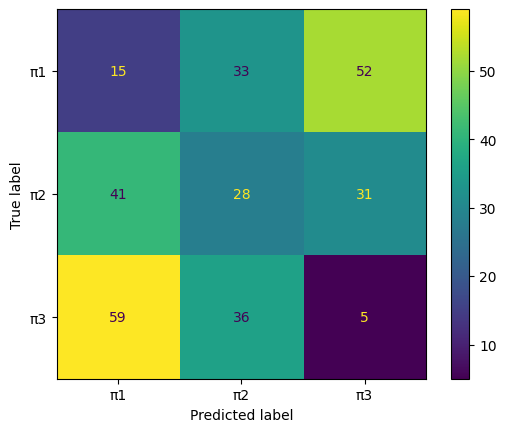

In [ ]:
cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['π1','π2','π3'])
cm_disp.plot()

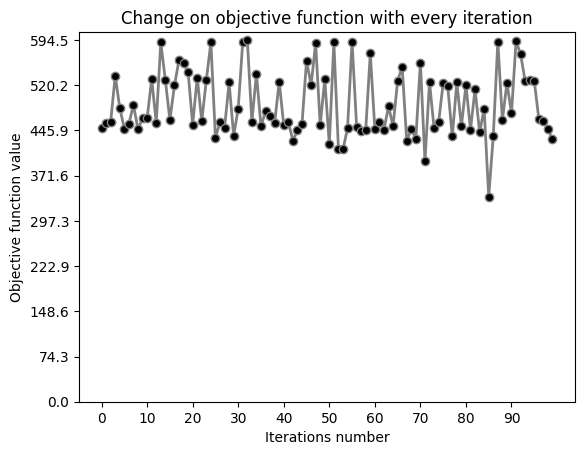

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

obj_list=[]
for iter_num, algorithm, obj_value in objective_values:
  obj_list.append(obj_value)

itr_list=[]
for iter_num, algorithm, obj_value in objective_values:
  itr_list.append(iter_num)

#itr_list and obj_list to numeric type
itr_list = [int(num) for num in itr_list]
obj_list = [float(val) for val in obj_list]

plt.plot(itr_list, obj_list, color='grey', linewidth=2, marker='o', markerfacecolor='black', markersize=6)
plt.xlabel('Iterations number')
plt.ylabel('Objective function value')
plt.title('Change on objective function with every iteration')

max_itr = max(itr_list)
plt.xticks(np.arange(0, max_itr, 10))
plt.yticks([i * max(obj_list) / 8 for i in range(9)])

plt.show()